Instalacion de librerias

In [11]:
pip install yfinance pandas matplotlib beautifulsoup4 requests


Note: you may need to restart the kernel to use updated packages.


In [12]:
import yfinance as yf
import pandas as pd


In [13]:
tesla_stock = yf.Ticker("TSLA")
tesla_history = tesla_stock.history(period="5y")
tesla_history.reset_index(inplace=True)
print(tesla_history.head())


                       Date       Open       High        Low      Close  \
0 2019-11-18 00:00:00-05:00  23.528000  23.543333  23.073334  23.332666   
1 2019-11-19 00:00:00-05:00  23.450001  23.999332  23.186666  23.968000   
2 2019-11-20 00:00:00-05:00  24.000000  24.080000  23.304667  23.481333   
3 2019-11-21 00:00:00-05:00  23.634001  24.056000  23.600000  23.655333   
4 2019-11-22 00:00:00-05:00  22.677334  22.733334  22.000000  22.202667   

      Volume  Dividends  Stock Splits  
0   66006000        0.0           0.0  
1  115872000        0.0           0.0  
2  100876500        0.0           0.0  
3   91650000        0.0           0.0  
4  253059000        0.0           0.0  


In [14]:
tesla_history.to_csv("tesla_stock_data.csv", index=False)


Pregunta 2: Extracción de datos de ingresos de Tesla utilizando Webscraping

In [15]:
import requests
from bs4 import BeautifulSoup

url = "https://finance.yahoo.com/quote/TSLA/financials"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Busca los datos de ingresos
table = soup.find_all('div', class_='D(tbr)')
income_data = []
for row in table:
    columns = row.find_all('div', recursive=False)
    income_data.append([col.text for col in columns])

income_df = pd.DataFrame(income_data)
print(income_df.head())


Empty DataFrame
Columns: []
Index: []


Pregunta 3: Extracción de datos de acciones de GameStop utilizando yfinance

In [17]:
gamestop_stock = yf.Ticker("GME")
gamestop_history = gamestop_stock.history(period="5y")
gamestop_history.reset_index(inplace=True)
print(gamestop_history.head())
gamestop_history.to_csv("gamestop_stock_data.csv", index=False)


                       Date    Open    High     Low  Close    Volume  \
0 2019-11-18 00:00:00-05:00  1.4625  1.4625  1.4025  1.405  11983600   
1 2019-11-19 00:00:00-05:00  1.3925  1.4150  1.3625  1.375  13442000   
2 2019-11-20 00:00:00-05:00  1.3850  1.3850  1.3400  1.365  10666800   
3 2019-11-21 00:00:00-05:00  1.3650  1.3950  1.3375  1.375  11136000   
4 2019-11-22 00:00:00-05:00  1.3975  1.4625  1.3750  1.415  13972400   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


Pregunta 4: Extracción de datos de ingresos de GameStop utilizando Webscraping

In [19]:
url = "https://finance.yahoo.com/quote/GME/financials"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

table = soup.find_all('div', class_='D(tbr)')
income_data = []
for row in table:
    columns = row.find_all('div', recursive=False)
    income_data.append([col.text for col in columns])

gamestop_income_df = pd.DataFrame(income_data)
print(gamestop_income_df.head())


Empty DataFrame
Columns: []
Index: []


Pregunta 5: Tablero de acciones e ingresos de Tesla

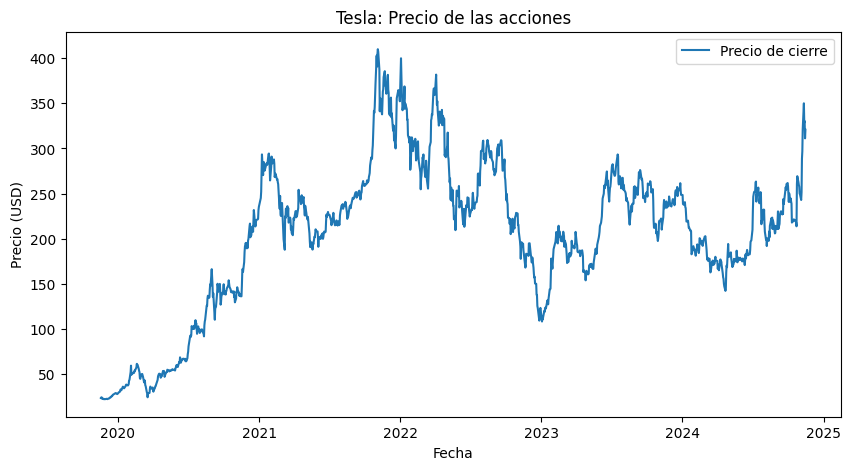

In [20]:
import matplotlib.pyplot as plt

# Gráfico de precios históricos de las acciones de Tesla
plt.figure(figsize=(10, 5))
plt.plot(tesla_history['Date'], tesla_history['Close'], label="Precio de cierre")
plt.title("Tesla: Precio de las acciones")
plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.legend()
plt.show()


Pregunta 6: Cuadro de mando de acciones e ingresos de GameStop


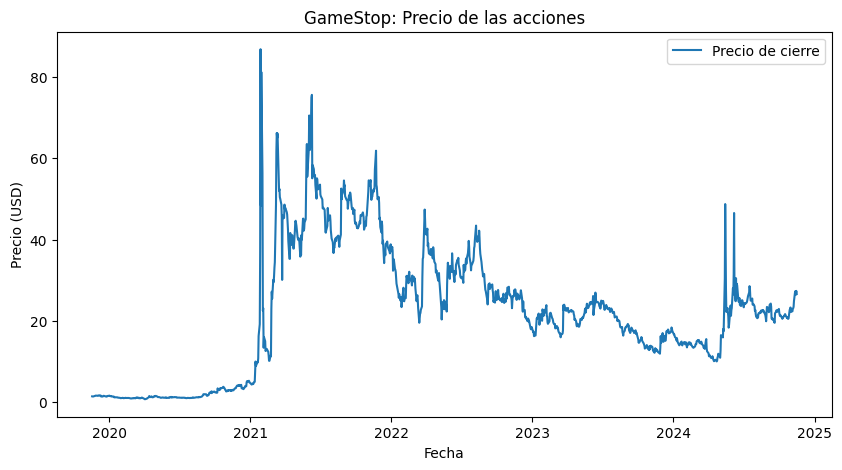

In [23]:
# Gráfico de precios históricos de GameStop
plt.figure(figsize=(10, 5))
plt.plot(gamestop_history['Date'], gamestop_history['Close'], label="Precio de cierre")
plt.title("GameStop: Precio de las acciones")
plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.legend()
plt.show()

